# 인공지능과 가위바위보 하기

In [1]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [2]:
# 가위바위보 Train 데이터 수집 후 불러와서 resize 하기

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/Ex_1/Scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")


def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/Ex_1/Rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")


def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/Ex_1/Paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1540  images to be resized.
1540  images resized.
가위 이미지 resize 완료!
1540  images to be resized.
1540  images resized.
바위 이미지 resize 완료!
1540  images to be resized.
1540  images resized.
보 이미지 resize 완료!


In [3]:
# 이미지 라벨링 하기

import numpy as np

def load_train_data(img_path, number_of_data=4620):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/Ex_1"
(x_train, y_train)=load_train_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1568 입니다.
x_train shape: (4620, 28, 28, 3)
y_train shape: (4620,)


라벨:  0


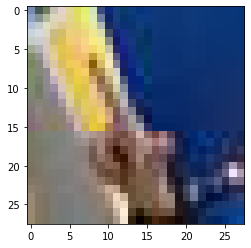

In [4]:
# 라벨 확인하기(train)

import matplotlib.pyplot as plt

plt.imshow(x_train[100])
print('라벨: ', y_train[100])

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [6]:
# 모델 설계하기

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 3)))  # 입력 이미지의 형태
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Conv2D(256, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Conv2D(256, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 256)         5

In [8]:
# 학습

import warnings
warnings.filterwarnings(action='ignore')  # 오류 무시 (Adam)

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=15)

Epoch 1/15
145/145 [==============================] - 4s 6ms/step - loss: 0.7085 - accuracy: 0.7701
Epoch 2/15
145/145 [==============================] - 1s 5ms/step - loss: 0.3520 - accuracy: 0.8019
Epoch 3/15
145/145 [==============================] - 1s 5ms/step - loss: 0.3481 - accuracy: 0.8030
Epoch 4/15
145/145 [==============================] - 1s 5ms/step - loss: 0.3401 - accuracy: 0.8197
Epoch 5/15
145/145 [==============================] - 1s 5ms/step - loss: 0.3204 - accuracy: 0.8457
Epoch 6/15
145/145 [==============================] - 1s 5ms/step - loss: 0.2991 - accuracy: 0.8665
Epoch 7/15
145/145 [==============================] - 1s 5ms/step - loss: 0.2565 - accuracy: 0.8944
Epoch 8/15
145/145 [==============================] - 1s 5ms/step - loss: 0.2153 - accuracy: 0.9149
Epoch 9/15
145/145 [==============================] - 1s 5ms/step - loss: 0.1878 - accuracy: 0.9301
Epoch 10/15
145/145 [==============================] - 1s 5ms/step - loss: 0.1582 - accuracy: 0.9385

In [9]:
# Test 데이터 준비

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/Ex_1/test/Scissor"
resize_images(image_dir_path)

print("가위 테스트 이미지 resize 완료!")


def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/Ex_1/test/Rock"
resize_images(image_dir_path)

print("바위 테스트 이미지 resize 완료!")


def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/Ex_1/test/Paper"
resize_images(image_dir_path)

print("보 테스트 이미지 resize 완료!")

124  images to be resized.
124  images resized.
가위 테스트 이미지 resize 완료!
124  images to be resized.
124  images resized.
바위 테스트 이미지 resize 완료!
124  images to be resized.
124  images resized.
보 테스트 이미지 resize 완료!


In [10]:
import numpy as np

def load_test_data(img_path, number_of_data=372):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/Scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/Rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/Paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/Ex_1/test"
(x_test, y_test)=load_test_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 372 입니다.
x_test shape: (372, 28, 28, 3)
y_test shape: (372,)


라벨:  2


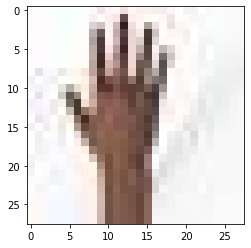

In [11]:
# 라벨 확인
import matplotlib.pyplot as plt
plt.imshow(x_test[299])
print('라벨: ', y_test[299])

In [12]:
# 테스트
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {}".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

12/12 - 0s - loss: 1.0310 - accuracy: 0.6183
test_loss: 1.031044363975525
test_accuracy: 0.6182795763015747


# 회고

가위, 바위, 보 각각 100장씩 총 300장의 데이터를 시작으로 모델을 만들어 학습한 결과 매우 낮은 accuracy를 보이며, 좋지 않은 결과를 보여주었고 이후에 일단은 훈련 데이터의 양과 질을 높여보기 위해서 캐글이나 웹사이트 등을 통해 관련 데이터들을 수집해보기도 하고 다른 사람들의 row한 데이터들도 공유해보며 데이터셋에 중점을 두어보기로 시작했다.
사실 생각한 데이터셋들을 모두 돌려보지는 못했지만 일단 만들어둔 데이터셋은 훈련데이터 3000장 가량과 테스트셋 300장 가량으로 고정하고 나서는 하이퍼파라미터와 오버피팅을 생각하면서 하이퍼파라미터를 마구 바꿔보고 계층에 Dropout도 쓰면서 모델의 accuracy를 높이려 해본 결과 
겨우 60%의 accuracy를 일단 얻게 되었다.
이후에 배운 전이학습 모델을 이용한다던지 나중에 시간이 난다면 더 좋은 모델을 위해 생각해볼 예정이다.